In [1]:
import pandas as pd
import numpy as np
import pricey as pr
import yfinance as yf
import FinanceDataReader as fdr
from sklearn.decomposition import PCA, KernelPCA, FastICA
from tqdm.notebook import tqdm
import statsmodels.api as sm
import itertools

from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.preprocessing import StandardScaler, MinMaxScaler#, Imputer
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [103]:
univ = pd.read_excel('kstock_tickers.xlsx', converters={'code':str})
univ = list(univ['code']); univ

['005935',
 '066575',
 '005930',
 '000660',
 '006400',
 '051910',
 '005380',
 '035420',
 '068270',
 '000270',
 '035720',
 '105560',
 '005490',
 '055550',
 '207940',
 '012330',
 '373220',
 '028260',
 '086790',
 '033780',
 '066570',
 '096770',
 '316140',
 '017670',
 '034730',
 '003550',
 '030200',
 '009150',
 '259960',
 '036570',
 '323410',
 '000810',
 '009830',
 '015760',
 '032830',
 '051900',
 '010130',
 '011200',
 '003490',
 '034020',
 '003670',
 '011070',
 '018260',
 '402340',
 '028050',
 '009540',
 '010950',
 '010140',
 '352820',
 '047810',
 '097950',
 '090430',
 '034220',
 '021240',
 '000100',
 '035250',
 '086280',
 '032640',
 '251270',
 '000720',
 '011170',
 '267250',
 '004020',
 '024110',
 '161390',
 '377300',
 '010620',
 '005830',
 '011780',
 '008770',
 '383220',
 '271560',
 '006800',
 '329180',
 '071050',
 '012450',
 '018880',
 '078930',
 '016360',
 '011790',
 '001450',
 '139480',
 '010060',
 '128940',
 '138930',
 '004170',
 '030000',
 '302440',
 '006360',
 '326030',
 '000990',

In [117]:
_dflist = [fdr.DataReader(code, '2022-02-28', '2023-02-28')['Close'] for code in tqdm(univ)]

  0%|          | 0/138 [00:00<?, ?it/s]

In [118]:
p = pd.concat(_dflist, axis=1)
p.columns = univ
p.tail()

,005935,066575,005930,000660,006400,051910,005380,035420,068270,000270,...,001740,114090,178920,009240,001680,294870,006650,192820,003850,105630
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-22,54800,49000,61100,89100,684000,666000,174200,211500,149000,74500,...,3965,19990,34100,46400,19780,10730,189400,80000,9040,17370
2023-02-23,55100,49900,62000,92700,681000,668000,176200,213500,149000,76400,...,4150,20350,35800,46600,20050,10800,189900,81000,9060,17180
2023-02-24,54500,49500,61300,91000,680000,669000,173900,208000,149300,75300,...,4130,19990,34850,45750,20050,10600,179900,80900,9080,17330
2023-02-27,53600,48550,60500,90000,678000,657000,173300,208000,146000,76000,...,4080,20200,34300,45400,19780,10450,174800,78000,8950,17050
2023-02-28,53400,47500,60600,89400,696000,680000,176300,208500,145200,75300,...,4115,20600,34900,44850,19950,10360,174000,77300,9000,16680


In [202]:
logp = np.log(p).fillna(0)

In [203]:
logp

,005935,066575,005930,000660,006400,051910,005380,035420,068270,000270,...,001740,114090,178920,009240,001680,294870,006650,192820,003850,105630
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-28,11.098924,10.995411,11.185809,11.723996,13.214031,13.244581,12.072541,12.669807,11.942387,11.209114,...,8.391630,9.588777,10.677062,11.198215,10.010097,9.683464,12.043554,11.360939,9.429476,10.027915
2022-03-02,11.089805,10.998761,11.180246,11.736069,13.212204,13.226723,12.046491,12.666657,11.939245,11.185809,...,8.416267,9.595603,10.691945,11.198215,10.005593,9.720165,11.995352,11.370209,9.453287,10.045421
2022-03-03,11.098924,11.013699,11.196844,11.767568,13.219490,13.232114,12.086726,12.693118,12.012002,11.209114,...,8.421783,9.585346,10.700995,11.252859,10.019046,9.752665,12.007622,11.363265,9.461099,10.043249
2022-03-04,11.089805,11.007087,11.177453,11.732061,13.176852,13.190022,12.058153,12.668233,11.988333,11.199584,...,8.425078,9.595603,10.700995,11.277203,10.014582,9.795345,11.989160,11.346871,9.457200,10.034516
2022-03-07,11.057219,10.983596,11.157678,11.691072,13.144125,13.149979,12.031719,12.634603,11.976288,11.171843,...,8.415160,9.553930,10.734220,11.302204,9.989665,9.764225,11.941456,11.299732,9.437476,9.996522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,10.911445,10.799576,11.020267,11.397515,13.435713,13.409045,12.067959,12.261980,11.911702,11.218554,...,8.285261,9.902987,10.437053,10.745055,9.892427,9.280799,12.151616,11.289782,9.109414,9.762500
2023-02-23,10.916905,10.817776,11.034890,11.437124,13.431318,13.412043,12.079375,12.271392,11.911702,11.243738,...,8.330864,9.920836,10.485703,10.749356,9.905984,9.287301,12.154253,11.302204,9.111624,9.751501
2023-02-24,10.905956,10.809728,11.023535,11.418615,13.429848,13.413539,12.066236,12.245293,11.913713,11.229235,...,8.326033,9.902987,10.458808,10.730947,9.905984,9.268609,12.100156,11.300969,9.113829,9.760194


In [204]:
scaler = StandardScaler()
logp_scaled = scaler.fit_transform(logp); logp_scaled

array([[ 2.38536234,  1.64497534,  2.14406372, ...,  1.41483993,
         1.23773358,  1.07569932],
       [ 2.25409828,  1.66921724,  2.06762002, ...,  1.46750711,
         1.44919086,  1.16138999],
       [ 2.38536234,  1.77731188,  2.295687  , ...,  1.42805257,
         1.51857236,  1.15076034],
       ...,
       [-0.3924498 ,  0.30133646, -0.08570065, ...,  1.0741245 ,
        -1.56545489, -0.23478154],
       [-0.63215327,  0.16110992, -0.26620532, ...,  0.86672389,
        -1.69352169, -0.31451497],
       [-0.68596714,  0.00289411, -0.24351214, ...,  0.81550652,
        -1.64404643, -0.42190932]])

In [205]:
logp_scaled.shape

(249, 138)

In [438]:
reducer = PCA(n_components=0.83, random_state=0)
# reducer = FastICA(n_components=3, random_state=0)
comp = reducer.fit_transform(logp_scaled); comp

array([[-12.15619692,   2.57702013,   4.63991248,   0.51477679,
          4.86636468],
       [-12.12091989,   2.17314062,   4.25158416,   0.75013803,
          5.12644213],
       [-13.32480302,   2.27342373,   3.24869307,   0.10705062,
          5.00371028],
       ...,
       [  5.07601531,   8.58939345,   1.83328165,  -4.70260306,
          1.34344863],
       [  5.83689282,   8.74355374,   2.93682029,  -4.34894357,
          1.31999753],
       [  5.74310948,   8.83721276,   3.20719916,  -4.23363292,
          1.12866992]])

In [439]:
comp.shape

(249, 5)

In [398]:
logp_model = pd.DataFrame(scaler.inverse_transform(reducer.inverse_transform(comp)), index=p.index, columns=p.columns)
logp_model

,005935,066575,005930,000660,006400,051910,005380,035420,068270,000270,...,001740,114090,178920,009240,001680,294870,006650,192820,003850,105630
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-28,11.029910,10.968808,11.133633,11.643046,13.193493,13.109519,12.066842,12.662558,11.951868,11.240507,...,8.421768,9.631767,10.694004,11.315540,10.021160,9.600262,12.026868,11.372136,9.399405,10.106100
2022-03-02,11.028384,10.965622,11.131775,11.643255,13.195076,13.109370,12.069113,12.657465,11.953096,11.243213,...,8.424745,9.621355,10.698488,11.311576,10.024172,9.601957,12.013943,11.353652,9.405416,10.106238
2022-03-03,11.036860,10.987259,11.140097,11.651022,13.205707,13.125715,12.083689,12.686703,11.959962,11.258909,...,8.438865,9.631294,10.723826,11.332237,10.034157,9.622163,12.022745,11.378016,9.417581,10.127826
2022-03-04,11.031913,10.975147,11.134869,11.648395,13.204387,13.119141,12.080286,12.667951,11.958221,11.255543,...,8.437390,9.614193,10.720399,11.319006,10.034382,9.616892,12.003639,11.344207,9.421437,10.120833
2022-03-07,11.016717,10.939876,11.118871,11.639632,13.181074,13.091501,12.067192,12.632498,11.953995,11.243071,...,8.419773,9.584655,10.686330,11.292369,10.021681,9.589587,11.969465,11.296199,9.405327,10.084202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,10.921530,10.739896,11.023017,11.361327,13.414685,13.430831,12.039984,12.251259,12.032725,11.123721,...,8.283666,9.929856,10.351333,10.780907,9.944610,9.271307,12.088859,11.321421,9.142022,9.677851
2023-02-23,10.927864,10.756313,11.029339,11.365588,13.420960,13.443933,12.049769,12.275567,12.038050,11.133811,...,8.291033,9.945084,10.364339,10.796755,9.949125,9.282945,12.103029,11.352390,9.144496,9.690038
2023-02-24,10.925070,10.748906,11.026780,11.359451,13.424457,13.445787,12.044337,12.260177,12.036159,11.126364,...,8.286048,9.948710,10.354677,10.783058,9.946204,9.274031,12.105066,11.345278,9.139616,9.681376


<AxesSubplot:xlabel='Date'>

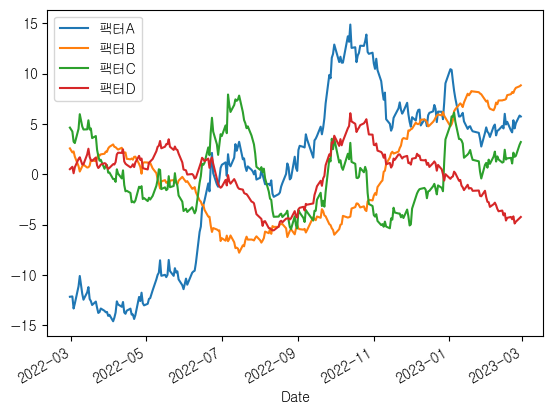

In [403]:
pd.DataFrame(comp, index=p.index, columns=['팩터A','팩터B','팩터C','팩터D']).plot()

In [233]:
comp[:,0].std()

8.360519972048438

In [124]:
comp.shape

(249, 4)

In [125]:
reducer.explained_variance_

array([70.18014216, 23.3155115 , 10.60847485,  7.06414659])

In [126]:
comp_std = reducer.explained_variance_**0.5
# comp_std = [comp[:,0].std(), comp[:,1].std(), comp[:,2].std()]; comp_std

In [430]:
reducer.explained_variance_ratio_#[:8].sum()

array([0.50650938, 0.16827446, 0.07656428, 0.05098389, 0.04169805,
       0.0313038 , 0.02254199, 0.01814292, 0.01043815, 0.00885662,
       0.00857616, 0.00503836, 0.00482234])

<AxesSubplot:>

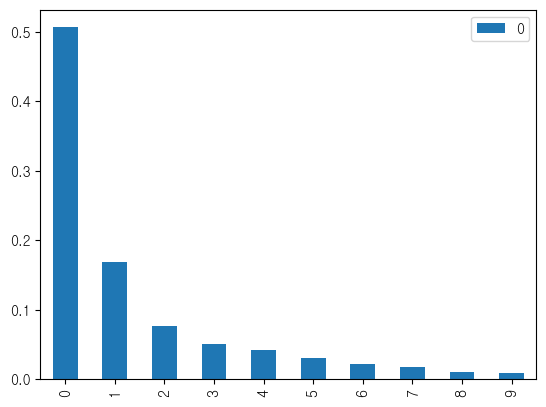

In [429]:
pd.DataFrame(reducer.explained_variance_ratio_[:10]).plot.bar()

In [128]:
reducer.singular_values_

array([131.92677991,  76.04108661,  51.2923168 ,  41.85580431])

In [129]:
np.diag(reducer.get_covariance())

array([1.01607654, 1.14534465, 1.04481253, 1.02760099, 0.95165309,
       1.0551219 , 0.96268603, 1.16966342, 0.59183194, 0.91589836,
       1.16384766, 1.08727173, 1.11885637, 0.84413229, 0.54335377,
       0.54818144, 1.00549851, 0.56509202, 1.09501252, 1.07986683,
       1.07785839, 1.06961065, 1.14099021, 1.12821121, 1.15827934,
       0.92525488, 0.73314252, 1.11480553, 1.08305328, 0.99246469,
       1.15834497, 0.54145762, 1.028945  , 0.92334152, 0.97186101,
       0.96695324, 0.86302754, 1.08962927, 1.15219009, 1.09730963,
       1.15092144, 1.08305659, 0.9860055 , 1.07282746, 0.7851097 ,
       1.04230663, 0.80481668, 0.8703948 , 1.13348822, 0.86536075,
       0.96955412, 1.11757058, 1.05114899, 1.11106392, 0.55485574,
       1.03536495, 0.89544682, 1.08822073, 1.16822563, 0.93447657,
       1.01707247, 0.91250643, 1.12845716, 1.1317297 , 0.68906115,
       1.15111695, 0.9766055 , 0.85908415, 0.91889126, 0.90771579,
       0.30329067, 1.03123385, 1.13439212, 0.80450998, 1.17756

In [130]:
reducer.components_.T

array([[-0.10284939,  0.05508563, -0.00161177,  0.0139126 ],
       [-0.1131692 ,  0.04293752, -0.00548904, -0.01635683],
       [-0.10192064,  0.06882574, -0.00036875,  0.02429634],
       [-0.10561858, -0.02821353,  0.03779031,  0.03693382],
       [ 0.06106344,  0.10288849, -0.15164009, -0.01888986],
       [ 0.07830554,  0.06522551, -0.1387086 , -0.13399228],
       [-0.0422948 , -0.1249957 , -0.07229005, -0.17813071],
       [-0.11331661, -0.02858071,  0.03993521, -0.0675147 ],
       [ 0.03759336, -0.0724186 , -0.04969324, -0.14369973],
       [-0.06667041, -0.11592202, -0.02548344, -0.11009663],
       [-0.11408371, -0.02054169,  0.03427025, -0.06244215],
       [-0.09128156,  0.11156583, -0.0305677 ,  0.01885111],
       [-0.03602732,  0.18544575, -0.05101049, -0.01608195],
       [-0.06700474,  0.11640024, -0.0182476 ,  0.03618127],
       [ 0.02554777, -0.0400974 , -0.15642679, -0.01504554],
       [-0.01483279,  0.00607955, -0.07274079, -0.19930699],
       [ 0.07013397,  0.

In [131]:
_sign = np.sign(reducer.components_.T.max(axis=1) + reducer.components_.T.min(axis=1)); _sign

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,
       -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,
       -1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
        1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1., -1.,  1., -1.])

In [132]:
X_clust = reducer.components_.T * _sign.reshape(-1, 1); X_clust

array([[ 0.10284939, -0.05508563,  0.00161177, -0.0139126 ],
       [ 0.1131692 , -0.04293752,  0.00548904,  0.01635683],
       [ 0.10192064, -0.06882574,  0.00036875, -0.02429634],
       [ 0.10561858,  0.02821353, -0.03779031, -0.03693382],
       [-0.06106344, -0.10288849,  0.15164009,  0.01888986],
       [-0.07830554, -0.06522551,  0.1387086 ,  0.13399228],
       [ 0.0422948 ,  0.1249957 ,  0.07229005,  0.17813071],
       [ 0.11331661,  0.02858071, -0.03993521,  0.0675147 ],
       [-0.03759336,  0.0724186 ,  0.04969324,  0.14369973],
       [ 0.06667041,  0.11592202,  0.02548344,  0.11009663],
       [ 0.11408371,  0.02054169, -0.03427025,  0.06244215],
       [-0.09128156,  0.11156583, -0.0305677 ,  0.01885111],
       [-0.03602732,  0.18544575, -0.05101049, -0.01608195],
       [-0.06700474,  0.11640024, -0.0182476 ,  0.03618127],
       [-0.02554777,  0.0400974 ,  0.15642679,  0.01504554],
       [ 0.01483279, -0.00607955,  0.07274079,  0.19930699],
       [-0.07013397, -0.

In [133]:
km = KMeans(n_clusters=4, random_state=0).fit(X_clust)
pd.DataFrame({'asset': univ, 'cluster': km.labels_}).sort_values('cluster')

,asset,cluster
0,005935,0
88,006360,0
87,302440,0
84,138930,0
81,139480,0
...,...,...
82,010060,3
100,007070,3
18,086790,3
120,088350,3


In [207]:
# hedger = reducer.components_.T * (reducer.explained_variance_**0.5) * np.reshape(log_p.std().values, (13,1)); 
hedger = reducer.components_.T * comp_std * logp.std().values.reshape(-1,1); 
# hedger = reducer.components_.T * comp_std * np.reshape(log_p.std().values * (52**0.5), (13,1)); 
# hedger = np.reshape(hedger[:,:1], (13,2)); hedger
# hedger = hedger[:, :4]; 
hedger

array([[-5.99743042e-02,  1.85147189e-02, -3.65414135e-04,
         2.57391720e-03],
       [-1.31279993e-01,  2.87092996e-02, -2.47563361e-03,
        -6.01994209e-03],
       [-6.22635134e-02,  2.42347027e-02, -8.75829809e-05,
         4.70906815e-03],
       [-1.09870990e-01, -1.69166918e-02,  1.52841943e-02,
         1.21896058e-02],
       [ 5.39348035e-02,  5.23805381e-02, -5.20740298e-02,
        -5.29345612e-03],
       [ 7.81056867e-02,  3.74992861e-02, -5.37914094e-02,
        -4.24026196e-02],
       [-2.29541256e-02, -3.91006643e-02, -1.52535744e-02,
        -3.06715171e-02],
       [-2.03117424e-01, -2.95285431e-02,  2.78310091e-02,
        -3.83949989e-02],
       [ 2.41459708e-02, -2.68101301e-02, -1.24093819e-02,
        -2.92827693e-02],
       [-5.32372840e-02, -5.33536404e-02, -7.91152481e-03,
        -2.78919915e-02],
       [-2.10887452e-01, -2.18866142e-02,  2.46299657e-02,
        -3.66207909e-02],
       [-7.20216430e-02,  5.07372009e-02, -9.37696119e-03,
      

In [208]:
hedger.shape

(138, 4)

In [175]:
n = len(assets)
b = hedger[:, :n-1][univ.index(assets[0])]; b
B = hedger[:, :n-1][[univ.index(asset) for asset in assets[1:]]]; B
w = b @ np.linalg.inv(B); w
w = np.insert(w, 0, -1); w

array([-1.        ,  0.96323354])

In [320]:
def get_w(_assets):
    n = len(_assets)
    b = hedger[:, :n-1][univ.index(_assets[0])]
    B = hedger[:, :n-1][[univ.index(asset) for asset in _assets[1:]]]
    w = b @ np.linalg.inv(B)
    w = np.insert(w, 0, -1)
    
    wp = w[w>0].sum()
    wm = -w[w<0].sum()
    return w / max(wp, wm)

def get_spread(_assets, _w):
    r = logp[_assets].diff().fillna(0) @ _w
    sp = r.cumsum()
    
    r_model = logp_model[_assets].diff().fillna(0) @ _w
    sp_model = r_model.cumsum()
    sp_model -= (sp_model - sp).mean()
    
    return {
        'sp': (sp - sp.mean()) / sp.std(),
        'sp_model': (sp_model - sp.mean()) / sp.std()
    }



def get_halflife(s):
    _lag = np.roll(s, 1)
    _lag[0] = 0
    _ret = s - _lag
    _ret[0] = 0

    _lag2 = sm.add_constant(_lag)

    _model = sm.OLS(_ret, _lag2)
    res = _model.fit()

    return -np.log(2) / res.params[1]


def get_profit_threshold(s):
    s0 = np.linspace(0, max(s), 50)
    f_bar = np.array([None]*50)
    for i in range(50):
        f_bar[i] = len(s.values[s.values > s0[i]]) / s.shape[0]
        
    D = np.zeros((49, 50))
    for i in range(D.shape[0]):
        D[i,i] = 1
        D[i,i+1] = -1
        
    I = 1.0
    f_star = np.linalg.inv(np.eye(50) + I * D.T@D) @ f_bar.reshape(-1, 1)
    s_star = [f_star[i] * s0[i] for i in range(50)]
    max_profit = max(s_star)[0]
    
    return {
        'profit': max_profit,
        'threshold': s0[s_star.index(max_profit)]
    }

def proc(_assets):
    _w = get_w(_assets)
    _sp = get_spread(_assets, _w)
    _hl = get_halflife(_sp)
    _pt = get_profit_threshold(_sp)
    
    return {
        'assets': _assets,
        'w': _w,
        'sp': _sp,
        'halflife': _hl,
        'profit': _pt['profit'],
        'threshold': _pt['threshold']
    }

In [419]:
assets = ['005930', '005935', '373220', '028260', '006400']
w = get_w(assets); w

array([-0.76877877,  0.82424172, -0.0745571 , -0.15666413,  0.14525702])

<AxesSubplot:xlabel='Date'>

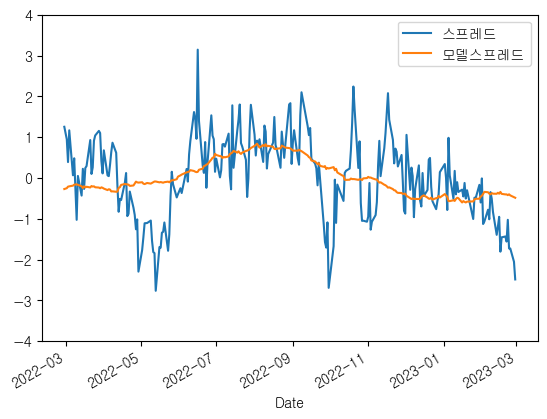

In [407]:
s = get_spread(assets, w)
pd.DataFrame({'스프레드':s['sp'], '모델스프레드':s['sp_model']}).plot(ylim=(-4,4))

<AxesSubplot:xlabel='Date'>

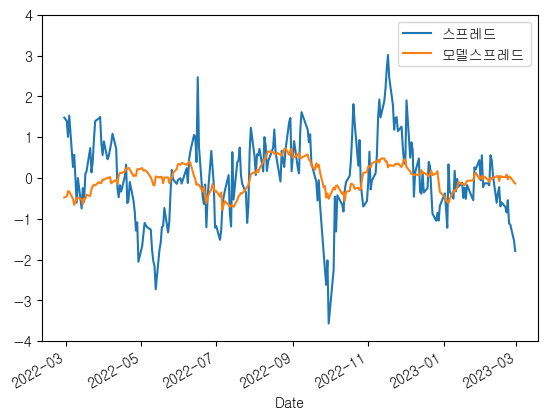

In [409]:
s = get_spread(assets, w)
pd.DataFrame({'스프레드':s['sp'], '모델스프레드':s['sp_model']}).plot(ylim=(-4,4))

<AxesSubplot:xlabel='Date'>

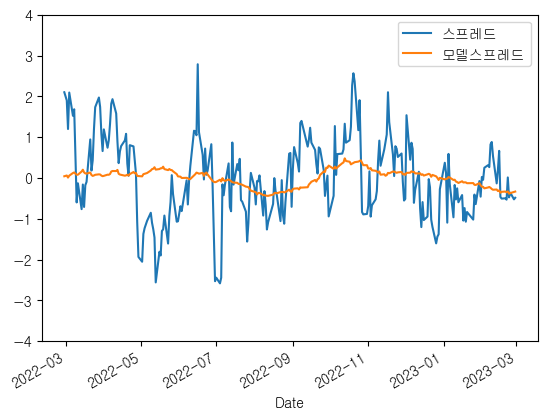

In [411]:
s = get_spread(assets, w)
pd.DataFrame({'스프레드':s['sp'], '모델스프레드':s['sp_model']}).plot(ylim=(-4,4))

1.7942545344309122

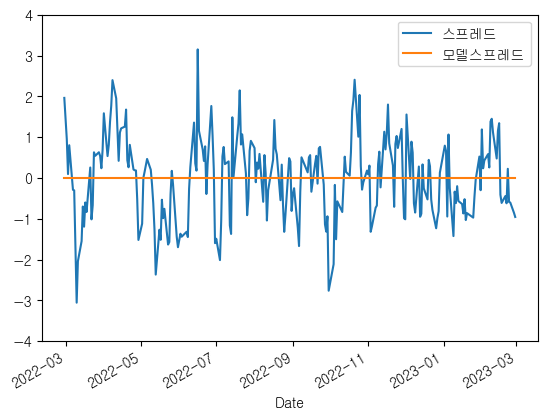

In [413]:
s = get_spread(assets, w)
pd.DataFrame({'스프레드':s['sp'], '모델스프레드':s['sp_model']}).plot(ylim=(-4,4))
get_halflife(s['sp'])

In [440]:
len(list(itertools.combinations(univ[2:], 6)))

MemoryError: 

In [140]:
assets_comb = list(itertools.combinations(univ[:20], 5))

In [141]:
output = []
for _assets in tqdm(assets_comb):
    output.append(proc(list(_assets)))

  0%|          | 0/15504 [00:00<?, ?it/s]

In [147]:
df = pd.DataFrame(output).sort_values('halflife'); df

,assets,w,sp,halflife,profit,threshold
944,"[005935, 005930, 006400, 051910, 207940]","[-0.8665550024742796, 0.830115620674212, -0.09...",Date 2023-02-28 1.577209 2023-02-27 1.04...,1.620485,0.161998,0.651735
942,"[005935, 005930, 006400, 051910, 005490]","[-0.8859177145121634, 0.9375570719967942, -0.0...",Date 2023-02-28 1.977905 2023-02-27 1.28...,1.797349,0.168620,0.799973
1035,"[005935, 005930, 006400, 373220, 028260]","[-0.824241720060485, 0.7687787702601855, -0.14...",Date 2023-02-28 0.956883 2023-02-27 0.85...,1.829285,0.185248,0.811210
1026,"[005935, 005930, 006400, 207940, 012330]","[-0.8830129675332263, 0.8147298384064658, -0.0...",Date 2023-02-28 1.759556 2023-02-27 1.38...,1.866693,0.165442,0.794754
982,"[005935, 005930, 006400, 068270, 373220]","[-0.8329384955383019, 0.8269307867613076, -0.1...",Date 2023-02-28 0.755774 2023-02-27 0.39...,1.930462,0.152912,0.690614
...,...,...,...,...,...,...
3562,"[005935, 000270, 035720, 055550, 012330]","[-0.7684606384517633, 0.16874858758117692, 0.0...",Date 2023-02-28 0.868968 2023-02-27 0.65...,29.598266,0.221312,0.760020
3126,"[005935, 005380, 055550, 207940, 012330]","[-0.4606780338717711, 0.32739064433388637, 0.5...",Date 2023-02-28 0.879516 2023-02-27 0.53...,30.419830,0.222942,0.974269
3631,"[005935, 000270, 055550, 207940, 012330]","[-0.6593101343950124, 0.26331791295841633, 0.6...",Date 2023-02-28 1.038661 2023-02-27 0.88...,30.599074,0.244514,0.832147
10891,"[000660, 000270, 055550, 207940, 012330]","[-0.2869333871905464, 0.3583665153811839, 0.34...",Date 2023-02-28 0.861308 2023-02-27 0.74...,31.458919,0.196980,0.730603


In [188]:
df.iloc[0]

assets                [005935, 005930, 006400, 051910, 207940]
w            [-0.8665550024742796, 0.830115620674212, -0.09...
sp           Date
2023-02-28    1.577209
2023-02-27    1.04...
halflife                                              1.620485
profit                                                0.161998
threshold                                             0.651735
Name: 944, dtype: object

<AxesSubplot:xlabel='Date'>

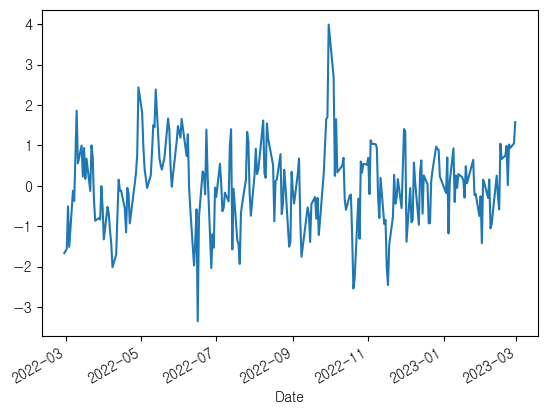

In [189]:
df.iloc[0].sp.plot()

<AxesSubplot:xlabel='profit', ylabel='halflife'>

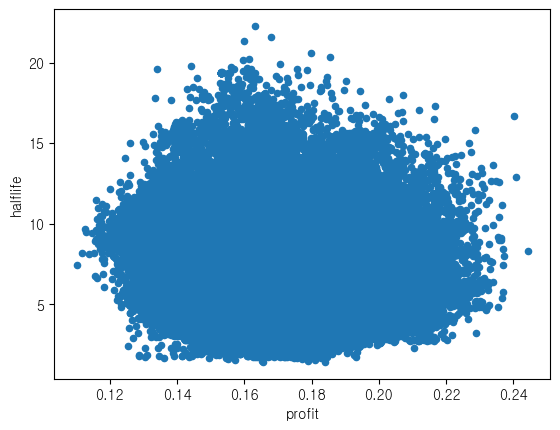

In [110]:
df.plot.scatter(x='profit', y='halflife')

In [376]:
df = p[['005935','005930']]; df

,005935,005930
Date,,
2022-02-28,66100,72100
2022-03-02,65500,71700
2022-03-03,66100,72900
2022-03-04,65500,71500
2022-03-07,63400,70100
...,...,...
2023-02-22,54800,61100
2023-02-23,55100,62000
2023-02-24,54500,61300


<AxesSubplot:xlabel='Date'>

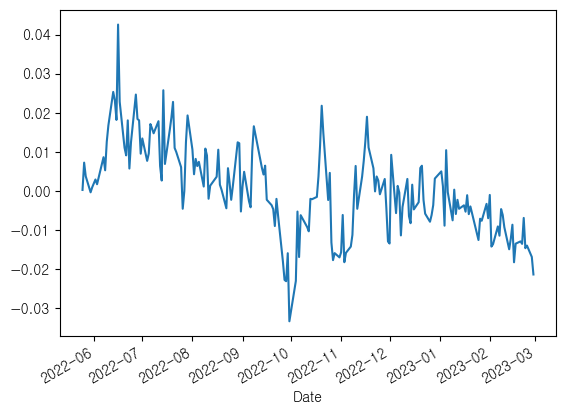

In [385]:
ratio = df['005935'] / df['005930']
(ratio - ratio.rolling(60).mean()).plot()

In [822]:
s0 = np.linspace(0, max(z), 50)
f_bar = np.array([None]*50)
for i in range(50):
    f_bar[i] = len(z.values[z.values > s0[i]]) / z.shape[0]

In [823]:
f_bar

array([0.484, 0.432, 0.388, 0.344, 0.3, 0.264, 0.224, 0.188, 0.156, 0.124,
       0.104, 0.092, 0.08, 0.068, 0.064, 0.056, 0.044, 0.044, 0.036,
       0.028, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024,
       0.02, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016,
       0.016, 0.016, 0.012, 0.012, 0.012, 0.008, 0.008, 0.004, 0.004,
       0.004, 0.004, 0.004, 0.0], dtype=object)

In [825]:
D = np.zeros((49, 50))
for i in range(D.shape[0]):
    D[i,i] = 1
    D[i,i+1] = -1

In [826]:
I = 1.0
f_star = np.linalg.inv(np.eye(50) + I * D.T@D) @ f_bar.reshape(-1, 1)
s_star = [f_star[i] * s0[i] for i in range(50)]

In [827]:
np.linalg.inv(D.T @ D + np.eye(50))

array([[6.18033989e-01, 2.36067977e-01, 9.01699437e-02, ...,
        1.41153282e-20, 5.64613129e-21, 2.82306565e-21],
       [2.36067977e-01, 4.72135955e-01, 1.80339887e-01, ...,
        2.82306565e-20, 1.12922626e-20, 5.64613129e-21],
       [9.01699437e-02, 1.80339887e-01, 4.50849719e-01, ...,
        7.05766412e-20, 2.82306565e-20, 1.41153282e-20],
       ...,
       [1.41153282e-20, 2.82306565e-20, 7.05766412e-20, ...,
        4.50849719e-01, 1.80339887e-01, 9.01699437e-02],
       [5.64613129e-21, 1.12922626e-20, 2.82306565e-20, ...,
        1.80339887e-01, 4.72135955e-01, 2.36067977e-01],
       [2.82306565e-21, 5.64613129e-21, 1.41153282e-20, ...,
        9.01699437e-02, 2.36067977e-01, 6.18033989e-01]])

In [829]:
threshold = s0[s_star.index(max(s_star))]; threshold

0.5640766833642608

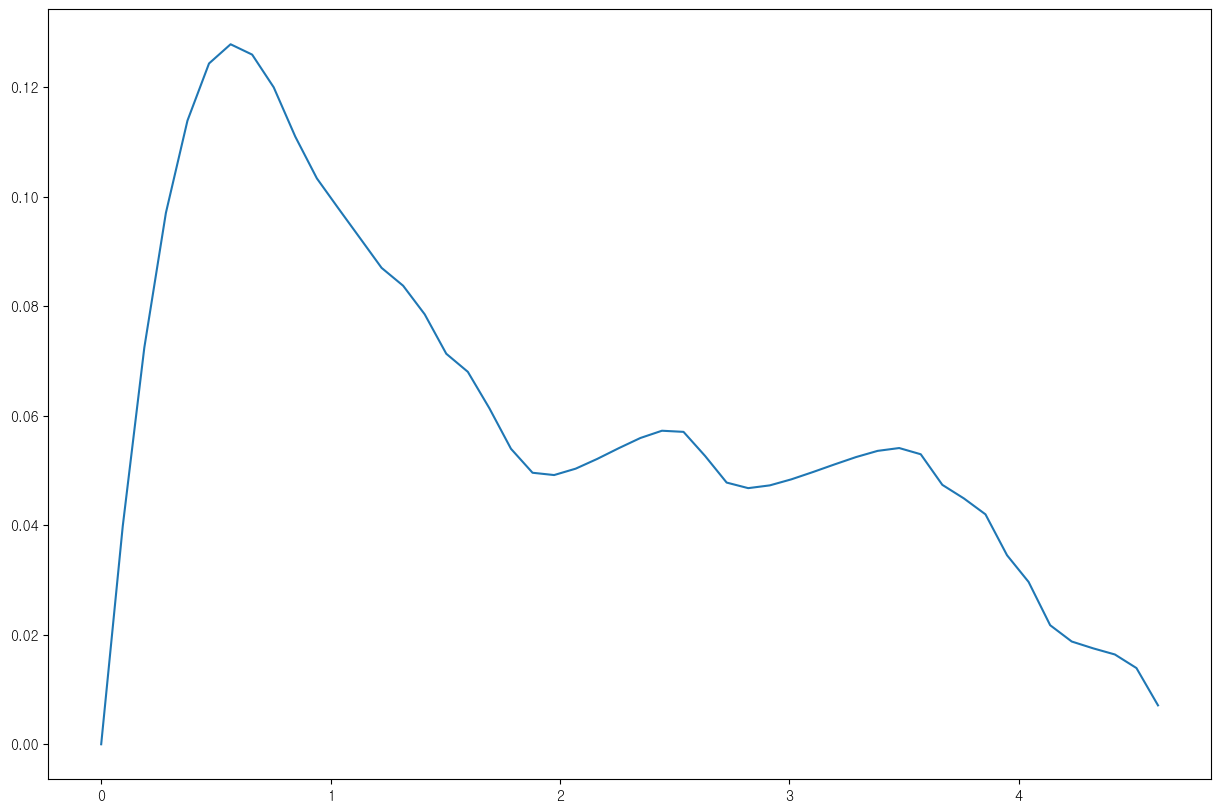

In [830]:
plt.figure(figsize=(15,10))
plt.plot(s0, s_star)